# Pandas - Practice

[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)

## Coverage

- Series & DataFrame
- Import & Export
- Describing
- Viewing & Selecting
- Manipulating & Performing

## 0. Import Pandas

In [1]:
import pandas as pd

## 1. Series and DataFrame

<img src="../images/pandas-dataframe-anatomy.png" alt="pandas dataframe with different sections labelled" width="800"/>

In [2]:
cars = pd.Series(['BMW', 'Toyota', 'Honda'])
cars

0       BMW
1    Toyota
2     Honda
dtype: object

In [3]:
colors = pd.Series(['Blue', 'Red', 'White'])
colors

0     Blue
1      Red
2    White
dtype: object

In [4]:
car_data = pd.DataFrame({"Car type": cars,
                         "Color": colors})
car_data

,Car type,Color
0,BMW,Blue
1,Toyota,Red
2,Honda,White


## 2. Import & Export

In [59]:
car_sales = pd.read_csv('../data/car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [8]:
car_sales.to_csv('../data/exported-car-sales-sehyeong.csv')

## 3. Describing

In [18]:
car_columns = car_sales.columns
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [19]:
car_columns[0]

'Make'

In [20]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [21]:
len(car_sales)

10

In [10]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [11]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [12]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [13]:
car_sales.mean()

<ipython-input-13-04f02239622f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_sales.mean()


Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [15]:
car_sales.sum() # 문자열 데이터는 말 그대로 문자열을 다 더해서 출력함

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

In [14]:
car_prices = pd.Series([3000, 3500, 11250])
car_prices.mean()

5916.666666666667

In [16]:
car_prices.sum()

17750

## 4. Viewing and Selecting

- `head()` & `tail()`
- `loc` & `iloc`
- `columns` - `df['A']`
- Boolean indexing - `df[df['A'] > 5]`
- `crosstab()`
- `.plot()`
- `hist()`

In [22]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [25]:
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [24]:
car_sales.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"


In [26]:
animals = pd.Series(['cat', 'dog', 'bird', 'snake', 'ox', 'lion'],
                    index=[0, 3, 9, 8, 67, 3])
animals

0       cat
3       dog
9      bird
8     snake
67       ox
3      lion
dtype: object

In [27]:
animals.loc[3] # 인덱스가 중복되어 인덱스가 '3'인 모든 데이터가 출력됨

3     dog
3    lion
dtype: object

In [28]:
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [30]:
animals.iloc[3] # 실제 4번째에 위치한 데이터, 중복될 일 없음

'snake'

In [33]:
car_sales.iloc[3] # car_sales는 실제 인덱스와 데이터 순서가 동일

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [37]:
animals.iloc[:3] # 데이터 순서이기 때문에 범위 슬라이싱도 가능

0     cat
3     dog
9    bird
dtype: object

In [40]:
car_sales.iloc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


In [42]:
car_sales.loc[:3] # 대신 순차적 인덱싱일 경우 loc과 iloc은 범위의 끝이 다름 (loc은 포함)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [43]:
car_sales['Colour']

0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7     Blue
8    White
9    White
Name: Colour, dtype: object

In [44]:
car_sales[car_sales['Odometer (KM)'] > 100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [45]:
car_sales[car_sales['Make'] == 'Toyota']

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [46]:
pd.crosstab(car_sales['Make'], car_sales['Doors'])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [48]:
car_sales.groupby(['Make']).mean()

<ipython-input-48-ca9bc61506e7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  car_sales.groupby(['Make']).mean()


,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<Axes: >

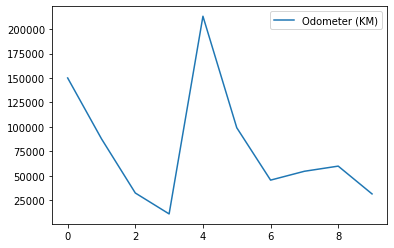

In [51]:
car_sales[['Odometer (KM)']].plot() # 여러 칼럼 선택 시 한 figure에 plot

array([[<Axes: title={'center': 'Odometer (KM)'}>,
        <Axes: title={'center': 'Doors'}>]], dtype=object)

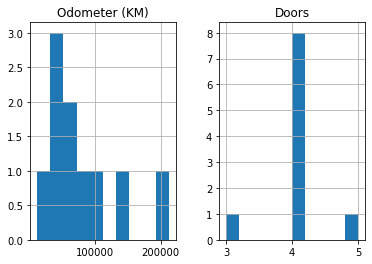

In [55]:
car_sales[['Odometer (KM)', 'Doors']].hist() # 여러 칼럼 선택 시 subplot 증가

In [60]:
car_sales['Price'] = car_sales['Price'].str[:-2].replace('[\$\,\.]', '', regex=True).astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [61]:
car_sales.dtypes # Price가 int로 바뀐 것을 확인 가능

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

<Axes: >

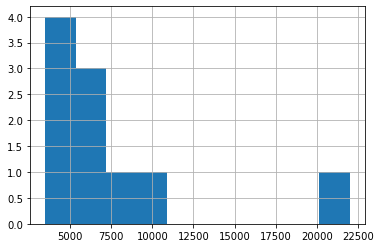

In [63]:
car_sales['Price'].hist()

## 5. Manipulating and Performing

In [65]:
car_sales['Make'] = car_sales['Make'].str.lower()
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043,4,4000
1,honda,Red,87899,4,5000
2,toyota,Blue,32549,3,7000
3,bmw,Black,11179,5,22000
4,nissan,White,213095,4,3500
5,toyota,Green,99213,4,4500
6,honda,Blue,45698,4,7500
7,honda,Blue,54738,4,7000
8,toyota,White,60000,4,6250
9,nissan,White,31600,4,9700


In [66]:
car_sales_missing = pd.read_csv('../data/car-sales-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [69]:
# 평균으로 결측값 채우기
car_sales_missing['Odometer'].fillna(car_sales_missing['Odometer'].mean(), inplace=True)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [72]:
car_sales_missing.dropna(inplace=True) # 결측값 있는 데이터 제거
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [73]:
seats_column = pd.Series([5] * 10) 
car_sales['Seats'] = seats_column # 모든 값이 같다면 Series 대신 스칼라로 선언해도 됨
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,4000,5
1,honda,Red,87899,4,5000,5
2,toyota,Blue,32549,3,7000,5
3,bmw,Black,11179,5,22000,5
4,nissan,White,213095,4,3500,5
5,toyota,Green,99213,4,4500,5
6,honda,Blue,45698,4,7500,5
7,honda,Blue,54738,4,7000,5
8,toyota,White,60000,4,6250,5
9,nissan,White,31600,4,9700,5


In [74]:
engine_sizes = [1.3, 2.0, 3.0, 4.2, 1.6, 1, 2.0, 2.3, 2.0, 3.0]
car_sales['Engine Size'] = engine_sizes
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size
0,toyota,White,150043,4,4000,5,1.3
1,honda,Red,87899,4,5000,5,2.0
2,toyota,Blue,32549,3,7000,5,3.0
3,bmw,Black,11179,5,22000,5,4.2
4,nissan,White,213095,4,3500,5,1.6
5,toyota,Green,99213,4,4500,5,1.0
6,honda,Blue,45698,4,7500,5,2.0
7,honda,Blue,54738,4,7000,5,2.3
8,toyota,White,60000,4,6250,5,2.0
9,nissan,White,31600,4,9700,5,3.0


In [75]:
car_sales['Price per KM'] = car_sales['Price'] / car_sales['Odometer (KM)']
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size,Price per KM
0,toyota,White,150043,4,4000,5,1.3,0.026659
1,honda,Red,87899,4,5000,5,2.0,0.056883
2,toyota,Blue,32549,3,7000,5,3.0,0.215060
3,bmw,Black,11179,5,22000,5,4.2,1.967976
4,nissan,White,213095,4,3500,5,1.6,0.016425
5,toyota,Green,99213,4,4500,5,1.0,0.045357
6,honda,Blue,45698,4,7500,5,2.0,0.164121
7,honda,Blue,54738,4,7000,5,2.3,0.127882
8,toyota,White,60000,4,6250,5,2.0,0.104167
9,nissan,White,31600,4,9700,5,3.0,0.306962


In [76]:
car_sales = car_sales.drop('Price per KM', axis=1)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size
0,toyota,White,150043,4,4000,5,1.3
1,honda,Red,87899,4,5000,5,2.0
2,toyota,Blue,32549,3,7000,5,3.0
3,bmw,Black,11179,5,22000,5,4.2
4,nissan,White,213095,4,3500,5,1.6
5,toyota,Green,99213,4,4500,5,1.0
6,honda,Blue,45698,4,7500,5,2.0
7,honda,Blue,54738,4,7000,5,2.3
8,toyota,White,60000,4,6250,5,2.0
9,nissan,White,31600,4,9700,5,3.0


In [78]:
car_sales_sampled = car_sales.sample(frac=0.3) # frac을 1로 설정하는 경우 shuffle
car_sales_sampled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size
7,honda,Blue,54738,4,7000,5,2.3
5,toyota,Green,99213,4,4500,5,1.0
0,toyota,White,150043,4,4000,5,1.3


In [79]:
car_sales_sampled.reset_index()

,index,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size
0,7,honda,Blue,54738,4,7000,5,2.3
1,5,toyota,Green,99213,4,4500,5,1.0
2,0,toyota,White,150043,4,4000,5,1.3


In [80]:
car_sales['Odometer (KM)'].apply(lambda x: x / 1.6)

0     93776.875
1     54936.875
2     20343.125
3      6986.875
4    133184.375
5     62008.125
6     28561.250
7     34211.250
8     37500.000
9     19750.000
Name: Odometer (KM), dtype: float64

In [81]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Engine Size
0,toyota,White,150043,4,4000,5,1.3
1,honda,Red,87899,4,5000,5,2.0
2,toyota,Blue,32549,3,7000,5,3.0
3,bmw,Black,11179,5,22000,5,4.2
4,nissan,White,213095,4,3500,5,1.6
5,toyota,Green,99213,4,4500,5,1.0
6,honda,Blue,45698,4,7500,5,2.0
7,honda,Blue,54738,4,7000,5,2.3
8,toyota,White,60000,4,6250,5,2.0
9,nissan,White,31600,4,9700,5,3.0
